In [1]:
#import relevant libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
print('libraries imported')

libraries imported


In [2]:
#import the dataset
website_url='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df= pd.read_csv(website_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [3]:
# To Check the null or NaN in the dataset
missing_data=df.isnull()
missing_data.head()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")


SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [4]:
#drop all irrelevant variables in the dataset
df = df.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df=df.drop('SEVERITYCODE.1',axis=1)
df.rename(columns={'X':'Longitude','Y':'Latitude'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   Longitude       189339 non-null  float64
 2   Latitude        189339 non-null  float64
 3   ADDRTYPE        192747 non-null  object 
 4   COLLISIONTYPE   189769 non-null  object 
 5   PERSONCOUNT     194673 non-null  int64  
 6   PEDCOUNT        194673 non-null  int64  
 7   PEDCYLCOUNT     194673 non-null  int64  
 8   VEHCOUNT        194673 non-null  int64  
 9   JUNCTIONTYPE    188344 non-null  object 
 10  INATTENTIONIND  29805 non-null   object 
 11  UNDERINFL       189789 non-null  object 
 12  WEATHER         189592 non-null  object 
 13  ROADCOND        189661 non-null  object 
 14  LIGHTCOND       189503 non-null  object 
 15  PEDROWNOTGRNT   4667 non-null    object 
 16  SPEEDING        9333 non-null    object 
 17  HITPARKEDC

In [5]:
#drop the columns with too much missing values
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#handle the typo and unclear value with NaN and drop it
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#drop the missing values in the rest columns
df.dropna(subset=["Longitude","Latitude","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], axis=0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   143747 non-null  int64  
 1   Longitude      143747 non-null  float64
 2   Latitude       143747 non-null  float64
 3   ADDRTYPE       143747 non-null  object 
 4   COLLISIONTYPE  143747 non-null  object 
 5   PERSONCOUNT    143747 non-null  int64  
 6   PEDCOUNT       143747 non-null  int64  
 7   PEDCYLCOUNT    143747 non-null  int64  
 8   VEHCOUNT       143747 non-null  int64  
 9   JUNCTIONTYPE   143747 non-null  object 
 10  UNDERINFL      143747 non-null  object 
 11  WEATHER        143747 non-null  object 
 12  ROADCOND       143747 non-null  object 
 13  LIGHTCOND      143747 non-null  object 
 14  HITPARKEDCAR   143747 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 17.5+ MB


In [6]:
df['SEVERITYCODE'].value_counts()

#creating a balanced dataset
df= df.sample(frac=1,random_state=0,replace=False)

#separate code 2  from original dataset.
df_code2 = df.loc[df['SEVERITYCODE'] == 2]

#select 58188 observations from the severity code 1(it has more values than code 2)
df_code1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

#get balanced dataset
df_balanced = pd.concat([df_code1,df_code2])
df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
df_balanced.info()
df_balanced['SEVERITYCODE'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEVERITYCODE   97852 non-null  int64  
 1   Longitude      97852 non-null  float64
 2   Latitude       97852 non-null  float64
 3   ADDRTYPE       97852 non-null  object 
 4   COLLISIONTYPE  97852 non-null  object 
 5   PERSONCOUNT    97852 non-null  int64  
 6   PEDCOUNT       97852 non-null  int64  
 7   PEDCYLCOUNT    97852 non-null  int64  
 8   VEHCOUNT       97852 non-null  int64  
 9   JUNCTIONTYPE   97852 non-null  object 
 10  UNDERINFL      97852 non-null  object 
 11  WEATHER        97852 non-null  object 
 12  ROADCOND       97852 non-null  object 
 13  LIGHTCOND      97852 non-null  object 
 14  HITPARKEDCAR   97852 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 11.9+ MB


2    48926
1    48926
Name: SEVERITYCODE, dtype: int64

In [7]:
A = df_balanced.iloc[:,1:]
#Encoding Categorical Features - Training Dataset
A = pd.get_dummies(data=A, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

B = df_balanced[['SEVERITYCODE']]
A.info()
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2,random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 50 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Longitude                                                       97852 non-null  float64
 1   Latitude                                                        97852 non-null  float64
 2   PERSONCOUNT                                                     97852 non-null  int64  
 3   PEDCOUNT                                                        97852 non-null  int64  
 4   PEDCYLCOUNT                                                     97852 non-null  int64  
 5   VEHCOUNT                                                        97852 non-null  int64  
 6   ADDRTYPE_Block                                                  97852 non-null  uint8  
 7   ADDRTYPE_Intersection                       

In [8]:
#Scaling training data as per the requirements
scaler = StandardScaler()
A_train[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(A_train[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#Scaling test data as per the requirements
scaler = StandardScaler()
A_test[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(A_test[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

A_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78281 entries, 157089 to 61252
Data columns (total 50 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Longitude                                                       78281 non-null  float64
 1   Latitude                                                        78281 non-null  float64
 2   PERSONCOUNT                                                     78281 non-null  float64
 3   PEDCOUNT                                                        78281 non-null  float64
 4   PEDCYLCOUNT                                                     78281 non-null  float64
 5   VEHCOUNT                                                        78281 non-null  float64
 6   ADDRTYPE_Block                                                  78281 non-null  uint8  
 7   ADDRTYPE_Intersection                       

In [9]:
df_corr = pd.concat([B_train,A_train])
df_corr = df_corr.corr()
df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

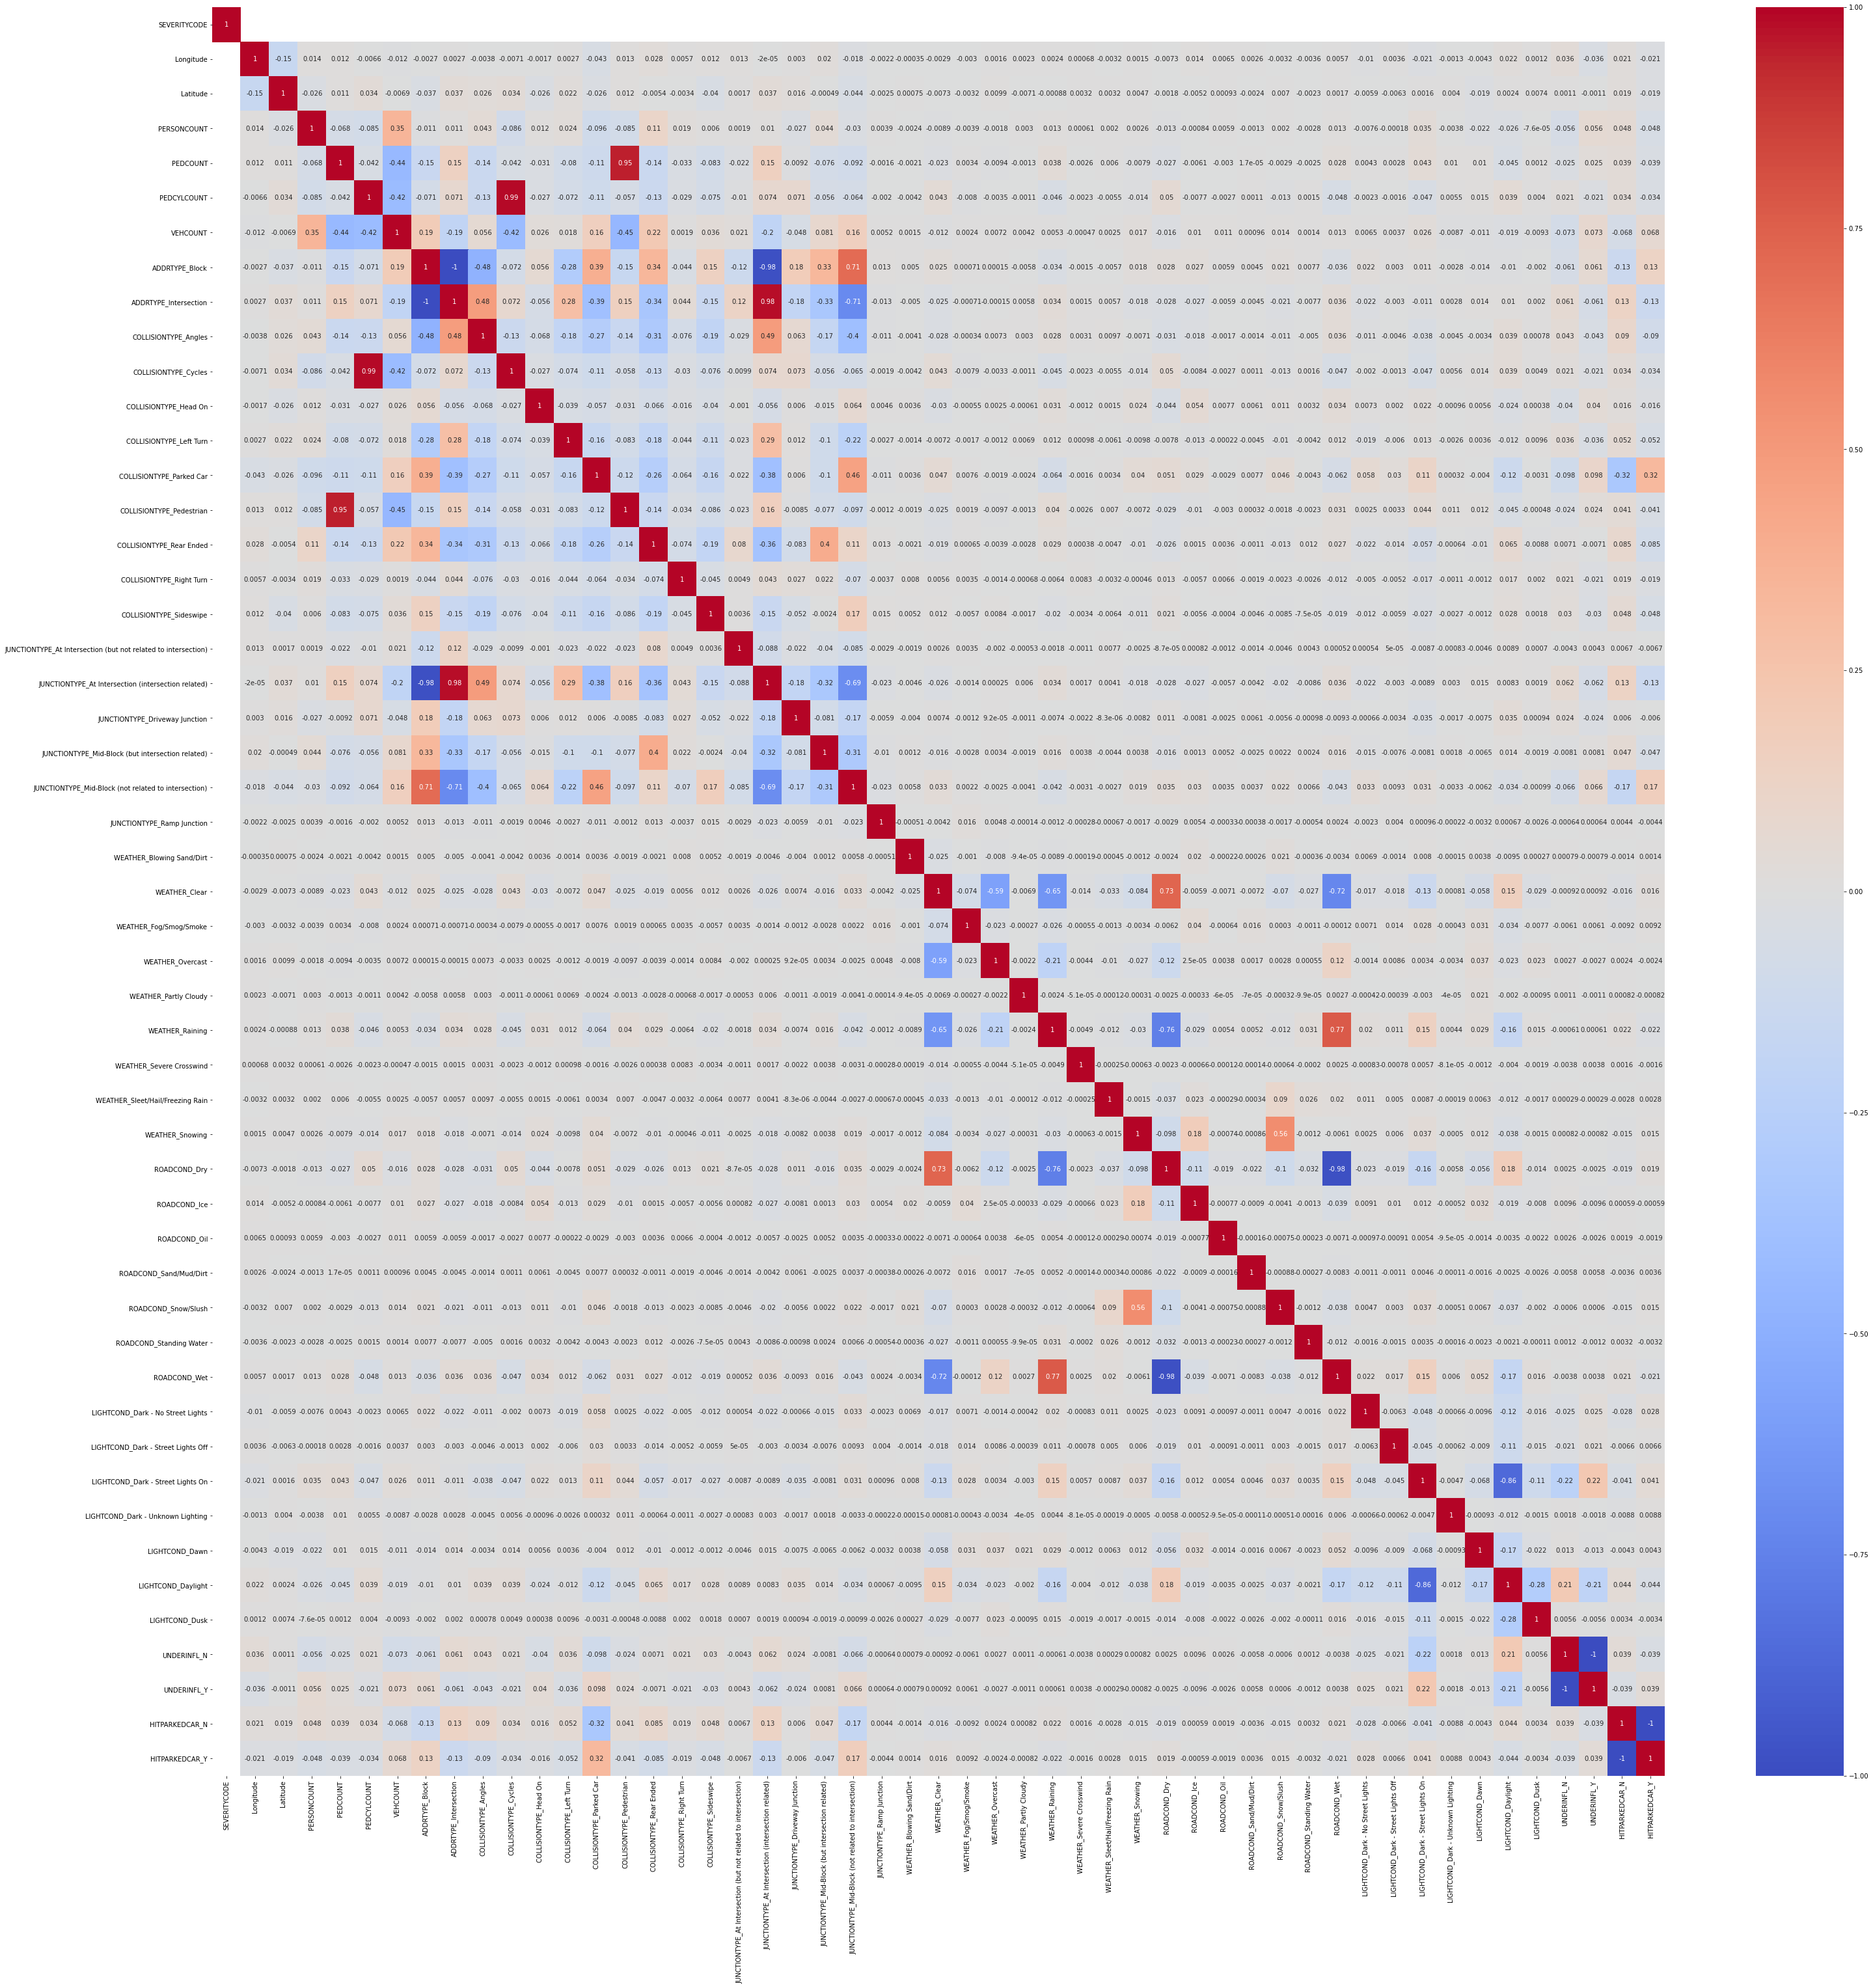

In [10]:
plt.figure(figsize=(50,50))
seaborn.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.savefig('correlation.png')


In [11]:
# Apply the Machine Learning Algorithm
## LogisticRegression FOR THE FOLLOWING ANALYSIS
#Fitting and Predictions
lr = LogisticRegression(random_state = 0)
lr.fit(A_train,B_train)
lr_predictions = lr.predict(A_test)

#Confusion Matrix
lr_cm = confusion_matrix(B_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(B_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

[[5348 4499]
 [1502 8222]] 

              precision    recall  f1-score   support

           1       0.78      0.54      0.64      9847
           2       0.65      0.85      0.73      9724

    accuracy                           0.69     19571
   macro avg       0.71      0.69      0.69     19571
weighted avg       0.71      0.69      0.69     19571
 

0.6933728475806039 



In [12]:
## KNeighborsClassifier for the Machine Learning process

#Fitting and Predictions
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,4,5,6,7],'p':[1,2]}
knn1 = GridSearchCV(knn, param_grid=params)
knn1.fit(A_train,B_train.values.ravel())
knn_predictions = knn1.predict(A_test)

print('Best Hyperparameter KNN : ',knn1.best_params_)

#Confusion Matrix
knn_cm = confusion_matrix(B_test,knn_predictions)
print(knn_cm,'\n')

#Classification Report
knn_cr = classification_report(B_test,knn_predictions)
print(knn_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,knn_predictions)
print(acc,'\n')
accDict['KNN'] = acc


Best Hyperparameter KNN :  {'n_neighbors': 7, 'p': 1}
[[6478 3369]
 [3104 6620]] 

              precision    recall  f1-score   support

           1       0.68      0.66      0.67      9847
           2       0.66      0.68      0.67      9724

    accuracy                           0.67     19571
   macro avg       0.67      0.67      0.67     19571
weighted avg       0.67      0.67      0.67     19571
 

0.6692555311430177 



In [13]:
#Bayes
nb = GaussianNB()
nb.fit(A_train,B_train)
nb_predictions = nb.predict(A_test)

#Confusion Matrix
nb_cm=confusion_matrix(B_test,nb_predictions)
print(nb_cm,'\n')

#Classification Report
nb_cr = classification_report(B_test,nb_predictions)
print(nb_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,nb_predictions)
print(acc,'\n')
accDict['NB'] = acc

[[9473  374]
 [7161 2563]] 

              precision    recall  f1-score   support

           1       0.57      0.96      0.72      9847
           2       0.87      0.26      0.40      9724

    accuracy                           0.61     19571
   macro avg       0.72      0.61      0.56     19571
weighted avg       0.72      0.61      0.56     19571
 

0.6149915691584488 



In [14]:
#Decision Tree 
#Fitting and Predictions
dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(A_train,B_train)
dtc_predictions = dtc1.predict(A_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

#Confusion Matrix
dtc_cm=confusion_matrix(B_test,dtc_predictions)
print(dtc_cm,'\n')

#Classification Report
dtc_cr = classification_report(B_test,dtc_predictions)
print(dtc_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

Best Hyperparameter DTC :  {'criterion': 'entropy', 'random_state': 0}
[[6296 3551]
 [3783 5941]] 

              precision    recall  f1-score   support

           1       0.62      0.64      0.63      9847
           2       0.63      0.61      0.62      9724

    accuracy                           0.63     19571
   macro avg       0.63      0.63      0.63     19571
weighted avg       0.63      0.63      0.63     19571
 

0.6252618670481835 



In [15]:
##random forest model
#Fitting and Predictions
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(A_train,B_train)
rf_predictions = rf1.predict(A_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(B_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(B_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,rf_predictions)
print(acc,'\n')
accDict['RFT'] = acc

Best Hyperparameter RFT :  {'criterion': 'entropy', 'n_estimators': 75, 'random_state': 0}
[[6401 3446]
 [3126 6598]] 

              precision    recall  f1-score   support

           1       0.67      0.65      0.66      9847
           2       0.66      0.68      0.67      9724

    accuracy                           0.66     19571
   macro avg       0.66      0.66      0.66     19571
weighted avg       0.66      0.66      0.66     19571
 

0.6641970262122529 



In [16]:
#Fitting and Predictions
svc = SVC()
params = {'kernel':['linear','rbf'], 
          'random_state':[0]}
svc1 = GridSearchCV(svc, param_grid=params)
svc1.fit(A_train,B_train)
svc_predictions = svc1.predict(A_test)
print('Best Hyperparameter SVM : ',svc1.best_params_)

#Confusion Matrix
svc_cm=confusion_matrix(B_test,svc_predictions)
print(svc_cm,'\n')

#Classification Report
svc_cr = classification_report(B_test,svc_predictions)
print(svc_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,svc_predictions)
print(acc,'\n')
accDict['SVC'] = acc

Best Hyperparameter SVM :  {'kernel': 'rbf', 'random_state': 0}
[[5206 4641]
 [1334 8390]] 

              precision    recall  f1-score   support

           1       0.80      0.53      0.64      9847
           2       0.64      0.86      0.74      9724

    accuracy                           0.69     19571
   macro avg       0.72      0.70      0.69     19571
weighted avg       0.72      0.69      0.69     19571
 

0.6947013438250472 



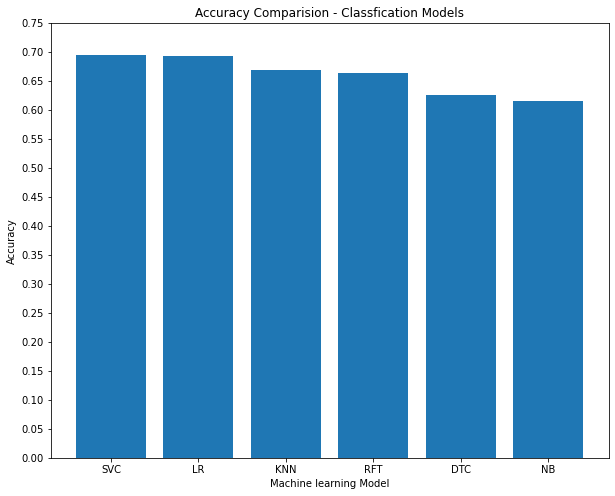

In [17]:
accDict = sorted(accDict.items(), key=lambda x: x[1], reverse=True)
dict1 = {}
for elem in accDict:
    dict1[elem[0]] = elem[1]
Algorithms = dict1.keys()
Accuracy = dict1.values()
plt.figure(figsize=(10,8))
plt.bar(Algorithms, Accuracy)
plt.xlabel('Machine learning Model')
plt.yticks(np.arange(0,max(Accuracy)+0.1,0.05))
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision - Classfication Models')
plt.show()